# Escamas de Mula

## Crossed Sections

In [1]:
DATADIR='data/' # Directory with the data
FIGURESDIR='figures/' # Figures produced
from PIL import Image

import functions
from functions import *

Our next goal will be to build the cross-sections in a Python environment so that all the data is mathematically calculated.

We start with the first cross-section shown in the image **xs.png**

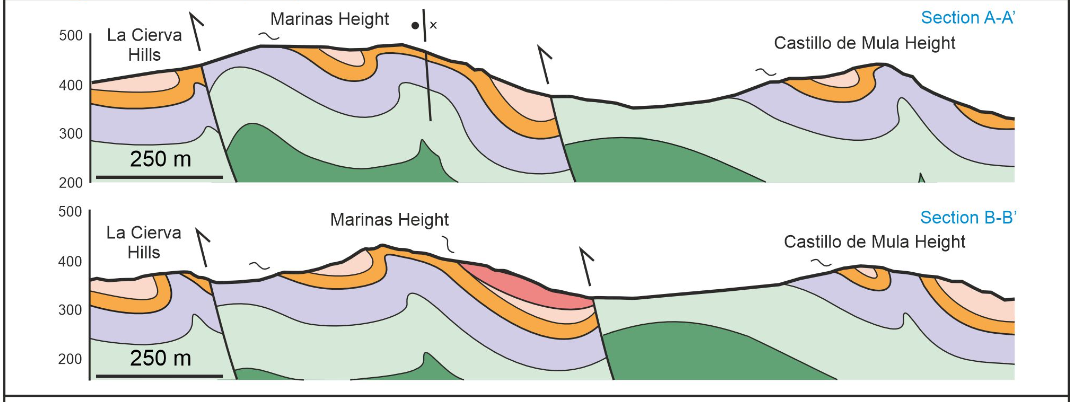

In [2]:
xs=Image.open(FIGURESDIR+'xs.png')
xs

We begin by calculating the line that determines the cut of the plane (corresponding to the cross section we are working with) with the topography.

In [3]:
P0=[630312.260878774, 4213164.354736202]
P2=[631727.2235457341, 4211098.154021688]
P1=[632080.5579142272, 4214387.312460086]
P3=[633495.5205811873, 4212321.111745572]
d=distance(P0,P1)
r1=para_line(P0,P1)
r2=para_line(P2,P3)
t_points = np.concatenate([np.arange(0, d, d/6),[d]])
Qs=[r1(x) for x in t_points]
QQs=[r2(x) for x in t_points]

We calculate a list of points on the line determined by Qs[0] and QQs[0].

In [4]:
dd=distance(Qs[0],QQs[0])
tt_points = np.concatenate([np.arange(0, dd, dd/125),[dd]]) # a list of parameters 

line_0=para_line(Qs[0],QQs[0])  ## the parametric equation of the line given by the points Qs[0] and QQs[0]
points_0=[line_0(x) for x in tt_points] # a list of 126 points in line_0

We calculate the elevation of the points in the **points_0** list using the **Copernicus** and **UTM** packages.

In [5]:
from copernico import *
import utm

To calculate these elevations we need the raster layer **eu_dem_v11_E30N10.TIF** this file is too big to be loaded on github, we download it from Copernicus elevation data ([EU-DEM](https://land.copernicus.eu/imagery-in-situ/eu-dem/)). We also load the file in google drive in ([eu_dem_v11_E30N10.TIF.ZIP](https://drive.google.com/file/d/11re2rlpHN2JzyyF7EitdVybsU-IcWpEK/view?usp=share_link)), download this file and save it to the data directory.

In [7]:
copernicus = CopernicusDEM(raster_paths=[DATADIR+'eu_dem_v11_E30N10.TIF'])

In [8]:
c0_utmx=[x[0] for x in points_0] # UTMX for the elements in points_0
c0_utmy=[x[1] for x in points_0] # UTMY for the elements in points_0
c0_lat_lon=[utm.to_latlon(c0_utmx[i],c0_utmy[i], 30, 'T') for i in range(len(c0_utmx))] # caldulate the latitude and longitude of the elements in points_0
c0_lat=[x[0] for x in c0_lat_lon]
c0_lon=[x[1] for x in c0_lat_lon]
aux0=[[c0_utmx[i],c0_utmy[i],c0_lat[i],c0_lon[i]] for i in range(len(c0_utmx))]
c0_pan=pd.DataFrame(aux0,columns = ['UTM_X','UTM_Y','latitude','longitude'])    # a pandas dataframe with utm and latitud and longitud for the elements in points_0
c0_pan=copernicus.get_elevation(c0_pan, lat_col='latitude', lon_col='longitude') # add elevation to the dataframe

Exportamos el dataframe anterior como fichero csv.

In [10]:
c0_pan.to_csv(DATADIR+'xs/xs0.csv')

The **xs** function automates the above process

In [11]:
def xs(point0,point1,name):
    line=para_line(point0,point1)  ## the parametric equation of the line given by the points Qs[0] and QQs[0]
    points=[line(x) for x in tt_points] # a list of 126 points in line_0
    utmx=[x[0] for x in points] # UTMX for the elements in points_0
    utmy=[x[1] for x in points] # UTMY for the elements in points_0
    lat_lon=[utm.to_latlon(utmx[i],utmy[i], 30, 'T') for i in range(len(utmx))] # caldulate the latitude and longitude of the elements in points_0
    lat=[x[0] for x in lat_lon]
    lon=[x[1] for x in lat_lon]
    aux=[[utmx[i],utmy[i],lat[i],lon[i]] for i in range(len(utmx))]
    pan=pd.DataFrame(aux,columns = ['UTM_X','UTM_Y','latitude','longitude'])    # a pandas dataframe with utm and latitud and longitud for the elements in points_0
    pan=copernicus.get_elevation(pan, lat_col='latitude', lon_col='longitude') # add elevation to the dataframe
    pan.to_csv(DATADIR+'xs/'+ name,index=False)

In [12]:
xs(Qs[0],QQs[0],'xs0.csv')
xs(Qs[1],QQs[1],'xs1.csv')
xs(Qs[2],QQs[2],'xs2.csv')
xs(Qs[3],QQs[3],'xs3.csv')
xs(Qs[4],QQs[4],'xs4.csv')
xs(Qs[5],QQs[5],'xs5.csv')
xs(Qs[6],QQs[6],'xs6.csv')

We are ready to obtain a figure with the vertical plane given by the points Qs[0] and QQs[0] and the cutting line with the topography

In [13]:
xs0=contact2_tr(DATADIR+'xs/xs0.csv',0)+['xs0']
cotas_xs0=[min(xs0[0]),max(xs0[0]),min(xs0[2]),max(xs0[2])]
xs0_t=[max(xs0[3])-x for x in xs0[3]]
d0=[np.sqrt(xs0[0][i]**2+xs0[1][i]**2) for i in range(len(xs0[0]))]
xs0_tt=[max(xs0[3])-x for x in d0]


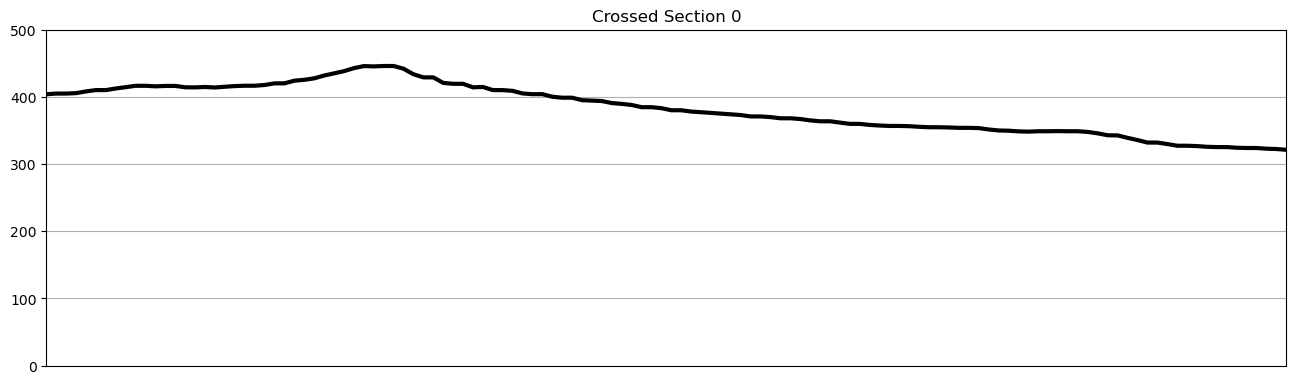

In [14]:
# Topography xs0'
ar0=500/(max(xs0_t)-min(xs0_t))
w, h = plt.figaspect(ar0)

fig, ax = plt.subplots(figsize=(w,h))
plt.plot(xs0_tt,xs0[2],color='black',linewidth=3)
#ax.scatter(c0_int_tt,c0_int_ele,color=c0_int[2],s=100)
tick_spacing=100
ax.xaxis.set_major_locator(ticker.MultipleLocator(5*tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.ylim((0,500))
plt.xlim((min(xs0_t),max(xs0_t)))
plt.grid()
plt.title('Crossed Section 0')
plt.xticks([])

plt.show()

We now add the intersection points

In [15]:
def add_elevation(pan,name):
    utmx=pan['X'] # UTMX for the elements in points_0
    utmy=pan['Y'] # UTMY for the elements in points_0
    lat_lon=[utm.to_latlon(utmx[i],utmy[i], 30, 'T') for i in range(len(utmx))] # caldulate the latitude and longitude of the elements in points_0
    lat=[x[0] for x in lat_lon]
    lon=[x[1] for x in lat_lon]
    aux=[[utmx[i],utmy[i],lat[i],lon[i]] for i in range(len(utmx))]
    pan1=pd.DataFrame(aux,columns = ['UTM_X','UTM_Y','latitude','longitude'])    # a pandas dataframe with utm and latitud and longitud for the elements in points_0
    pan1=copernicus.get_elevation(pan1, lat_col='latitude', lon_col='longitude') # add elevation to the dataframe
    pan1.to_csv(DATADIR+'intersections/'+ name,index=False)
    

In [16]:
int_c0=pd.read_csv(DATADIR+'intersections/int_c0.csv')
add_elevation(int_c0,'int_c0e.csv') # we add elevation
int_c0e=pd.read_csv(DATADIR+'intersections/int_c0e.csv')
int_c0e['color']=['brown','#00008B','#00feff','red','#B163FF','#00008B']# we add colors
int_c0e.to_csv(DATADIR+'intersections/int_c0ec.csv')


In [17]:

c0=contact3_tr(DATADIR+'intersections/int_c0ec.csv',0)
cd0=[np.sqrt(c0[0][i]**2+c0[1][i]**2) for i in range(len(c0[0]))]
c0_tt=[max(xs0[3])-x for x in cd0]


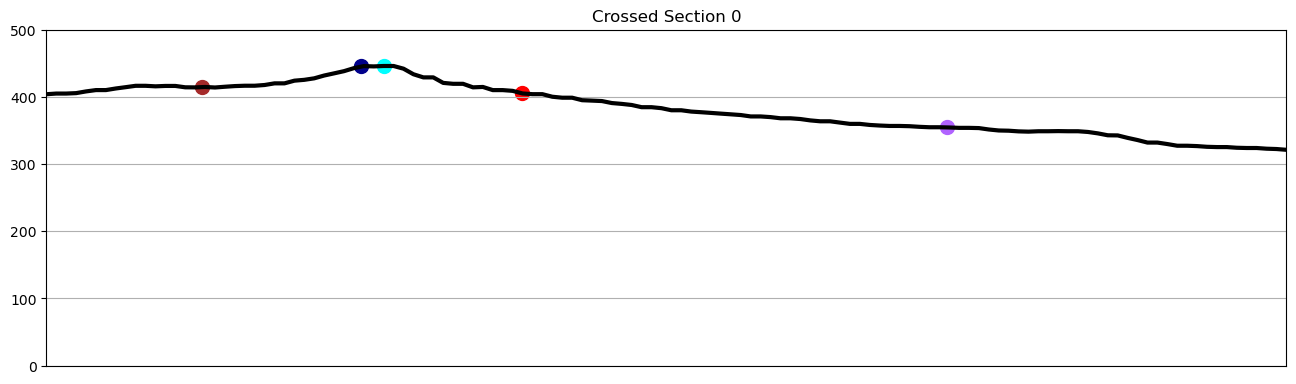

In [18]:
# Topography xs0'
ar0=500/(max(xs0_t)-min(xs0_t))
w, h = plt.figaspect(ar0)

fig, ax = plt.subplots(figsize=(w,h))
plt.plot(xs0_tt,xs0[2],color='black',linewidth=3)
for i in range(5):
    ax.scatter(c0_tt[i],c0[2][i],color=c0[4][i],s=100)
tick_spacing=100
ax.xaxis.set_major_locator(ticker.MultipleLocator(5*tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.ylim((0,500))
plt.xlim((min(xs0_t),max(xs0_t)))
plt.grid()
plt.title('Crossed Section 0')
plt.xticks([])

plt.show()


Now we'll add curves that represent the intersections of the plane corresponding to the cross section with the geological surfaces. These curves will be Béziers curves, determined by control points. Let's start with the intersection with the thrusts.

In [19]:
Control_cbm0=[[c0[0][0],c0[1][0],c0[2][0]],
                [xs0[0][20],xs0[1][20],100],
                [xs0[0][30],xs0[1][30],0]]  # de 60 en c0 he puessto 50

Control_cbm0x=[x[0] for x in Control_cbm0]
Control_cbm0y=[x[1] for x in Control_cbm0]
Control_cbm0ele=[x[2] for x in Control_cbm0]
Control_cbm0t=[np.sqrt(x[0]**2+x[1]**2) for x in Control_cbm0]
Control_cbm0tt=[max(xs0[3])-x for x in Control_cbm0t]


The **bz** function constructs a Bézier curve in a plane from the control points

In [20]:
Plano0=[Qs[0]+[400],QQs[0]+[400],Qs[0]+[200]] # the three points that determine the plane representin the crossed section 0

In [21]:
bz_cbm0=bz(Plano0,Control_cbm0)
bz_cbm0t=bz_cbm0[4]
bz_cbm0tt=[max(xs0[3])-x for x in bz_cbm0t]
bz_cbm0elv=bz_cbm0[2]

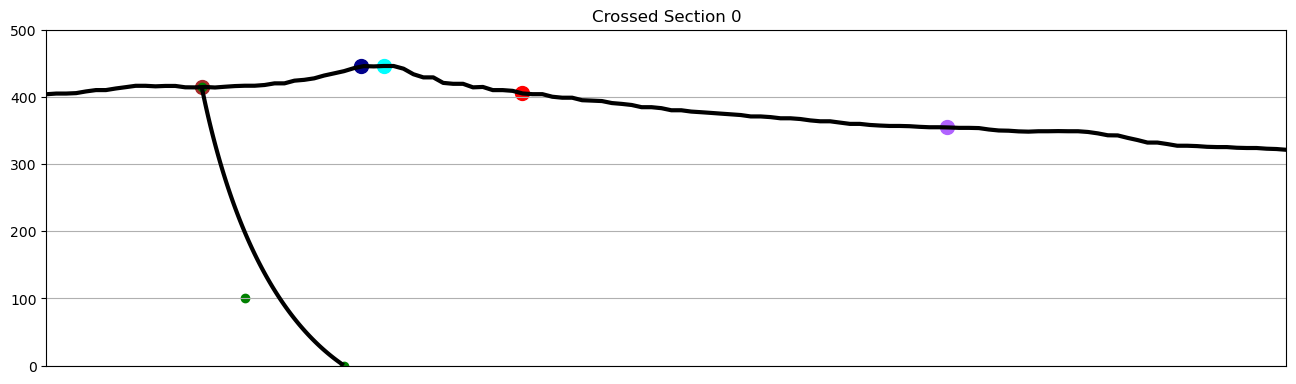

In [22]:
# Topography xs0'
ar0=500/(max(xs0_t)-min(xs0_t))
w, h = plt.figaspect(ar0)

fig, ax = plt.subplots(figsize=(w,h))
plt.plot(xs0_tt,xs0[2],color='black',linewidth=3)        # The surface
for i in range(5):                               
    ax.scatter(c0_tt[i],c0[2][i],color=c0[4][i],s=100)   # The intersections

ax.scatter(Control_cbm0tt,Control_cbm0ele,color='green') # Control points 
plt.plot(bz_cbm0tt,bz_cbm0elv,color='black',linewidth=3)

#ax.scatter(Control_cbm01tt,Control_cbm01ele,color='green') # Control points
#plt.plot(bz_cbm01tt,bz_cbm01elv,color='black',linewidth=3)

tick_spacing=100
ax.xaxis.set_major_locator(ticker.MultipleLocator(5*tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.ylim((0,500))
plt.xlim((min(xs0_t),max(xs0_t)))
plt.grid()
plt.title('Crossed Section 0')
plt.xticks([])

plt.show()

In order not to have to repeat these calculations, we save the data needed to construct this first Bezier curve as a CSV file.

In [23]:
Control_cbm0pan=pd.DataFrame(Control_cbm0x,columns = ['X'])
Control_cbm0pan['Y']=Control_cbm0y
Control_cbm0pan['Z']=Control_cbm0ele
Control_cbm0pan['t']=Control_cbm0t
Control_cbm0pan['tt']=Control_cbm0tt

Control_cbm0pan.to_csv(DATADIR+'control/Control_cbm0.csv')

bz_cbm0_pan=pd.DataFrame(bz_cbm0[0],columns = ['UTM_X'])
bz_cbm0_pan['UTM_Y']=bz_cbm0[1]
bz_cbm0_pan['elevation']=bz_cbm0[2]
bz_cbm0_pan['t']=bz_cbm0[4]
bz_cbm0_pan['tt']=bz_cbm0tt

bz_cbm0_pan.to_csv(DATADIR+'cbz/bz_cbm0.csv')



The **control_to_csv** and **bz_to_csv** functions automate the process.

We repeat the process for each of the curves that appear in this section.

In [24]:
Control_cbm01=[[c0[0][3],c0[1][3],c0[2][3]],
                [xs0[0][62],xs0[1][62],270],
                [xs0[0][57],xs0[1][57],130],
                [xs0[0][70],xs0[1][70],0]]

bz_cbm01=bz(Plano0,Control_cbm01)
control_to_csv(xs0,Control_cbm01,'Control_cbm01.csv')
bezier_to_csv(xs0,bz_cbm01,'bz_cbm01.csv')

In [25]:
Control0_C1_1=[[xs0[0][0],xs0[1][0],130],
               [xs0[0][20],xs0[1][20],80],
               [xs0[0][17],xs0[1][17],150]
              ]
bz0_C1_1=bz(Plano0,Control0_C1_1)

control_to_csv(xs0,Control0_C1_1,'Control0_C1_1.csv')
bezier_to_csv(xs0,bz0_C1_1,'bz0_C1_1.csv')

In [26]:
Control0_C1_11=[[xs0[0][18],xs0[1][18],150],
                [xs0[0][22],xs0[1][22],120],
                [bz_cbm0[0][50],bz_cbm0[1][50],bz_cbm0[2][50]]
              ]

bz0_C1_11=bz(Plano0,Control0_C1_11)

control_to_csv(xs0,Control0_C1_11,'Control0_C1_11.csv')
bezier_to_csv(xs0,bz0_C1_11,'bz0_C1_11.csv')

In [27]:
cte1=150
Control0_C2_1=[[xs0[0][0],xs0[1][0],130+cte1],
               [xs0[0][17],xs0[1][17],80+cte1],
               [xs0[0][14],xs0[1][14],150+cte1]
              ]
bz0_C2_1=bz(Plano0,Control0_C2_1)
control_to_csv(xs0,Control0_C1_11,'Control0_C2_1.csv')
bezier_to_csv(xs0,bz0_C2_1,'bz0_C2_1.csv')


Control0_C2_11=[[xs0[0][15],xs0[1][15],150+cte1],
                [xs0[0][19],xs0[1][19],120+cte1],
                [bz_cbm0[0][23],bz_cbm0[1][23],bz_cbm0[2][23]]
              ]
bz0_C2_11=bz(Plano0,Control0_C2_11)
control_to_csv(xs0,Control0_C1_11,'Control0_C2_11.csv')
bezier_to_csv(xs0,bz0_C2_11,'bz0_C2_11.csv')

cte2=cte1+70
Control0_P_1=[[xs0[0][0],xs0[1][0],130+cte2],
               [xs0[0][14],xs0[1][14],80+cte2],
               [xs0[0][13],xs0[1][13],130+cte2]
              ]
bz0_P_1=bz(Plano0,Control0_P_1)
control_to_csv(xs0,Control0_C1_11,'Control0_P_1.csv')
bezier_to_csv(xs0,bz0_P_1,'bz0_P_1.csv')



Control0_P_11=[[xs0[0][14],xs0[1][14],150+cte2-10],
                [xs0[0][17],xs0[1][17],120+cte2],
                [bz_cbm0[0][12],bz_cbm0[1][12],bz_cbm0[2][12]]
              ]
bz0_P_11=bz(Plano0,Control0_P_11)
control_to_csv(xs0,Control0_C1_11,'Control0_P_11.csv')
bezier_to_csv(xs0,bz0_P_11,'bz0_P_11.csv')


cte3=cte2+30
Control0_E1_1=[[xs0[0][0],xs0[1][0],130+cte3],
               [xs0[0][12],xs0[1][12],80+cte3],
               [xs0[0][11],xs0[1][11],130+cte3]
              ]
bz0_E1_1=bz(Plano0,Control0_E1_1)
control_to_csv(xs0,Control0_C1_11,'Control0_E1_1.csv')
bezier_to_csv(xs0,bz0_E1_1,'bz0_E1_1.csv')


Control0_E1_11=[[xs0[0][12],xs0[1][12],150+cte3-10],
                [xs0[0][13],xs0[1][13],120+cte3+20],
                [bz_cbm0[0][5],bz_cbm0[1][5],bz_cbm0[2][5]]
              ]
bz0_E1_11=bz(Plano0,Control0_E1_11)
control_to_csv(xs0,Control0_C1_11,'Control0_E1_11.csv')
bezier_to_csv(xs0,bz0_E1_11,'bz0_E1_11.csv')


Control0_E2_1=[[bz_cbm0[0][5],bz_cbm0[1][5],bz_cbm0[2][5]],
                [bz_cbm0[0][5],bz_cbm0[1][5],bz_cbm0[2][5]],
                [bz_cbm0[0][5],bz_cbm0[1][5],bz_cbm0[2][5]]
              ]
bz0_E2_1=bz(Plano0,Control0_E2_1)
control_to_csv(xs0,Control0_E2_1,'Control0_E2_1.csv')
bezier_to_csv(xs0,bz0_E2_1,'bz0_E2_1.csv')

# Segunda
Control0_C1_2=[[bz_cbm0[0][30],bz_cbm0[1][30],bz_cbm0[2][30]],
               [xs0[0][25],xs0[1][25],310],
              [xs0[0][31],xs0[1][31],85],
               [xs0[0][40],xs0[1][40],170],
              ]
bz0_C1_2=bz(Plano0,Control0_C1_2)
control_to_csv(xs0,Control0_C1_11,'Control0_C1_2.csv')
bezier_to_csv(xs0,bz0_C1_2,'bz0_C1_2.csv')

Control0_C1_21=[[xs0[0][42],xs0[1][42],175],
               [xs0[0][46],xs0[1][46],130], 
               [xs0[0][49],xs0[1][49],140],          
              ]
bz0_C1_21=bz(Plano0,Control0_C1_21)
control_to_csv(xs0,Control0_C1_11,'Control0_C1_21.csv')
bezier_to_csv(xs0,bz0_C1_21,'bz0_C1_21.csv')

Control0_C1_22=[[xs0[0][51],xs0[1][51],145],  
                [xs0[0][57],xs0[1][57],110], 
              [bz_cbm01[0][65],bz_cbm01[1][65],bz_cbm01[2][65]]
              ]
bz0_C1_22=bz(Plano0,Control0_C1_22)
control_to_csv(xs0,Control0_C1_11,'Control0_C1_22.csv')
bezier_to_csv(xs0,bz0_C1_22,'bz0_C1_22.csv')

Control0_C2_2=[[bz_cbm0[0][8],bz_cbm0[1][8],bz_cbm0[2][8]],
               [xs0[0][25],xs0[1][25],320+cte1],
               [xs0[0][31],xs0[1][31],95+cte1],
               [xs0[0][40],xs0[1][40],170+cte1],
              ]
bz0_C2_2=bz(Plano0,Control0_C2_2)
control_to_csv(xs0,Control0_C2_2,'Control0_C2_2.csv')
bezier_to_csv(xs0,bz0_C2_2,'bz0_C2_2.csv')



Control0_C2_22=[[xs0[0][42],xs0[1][42],165+cte1],
                [xs0[0][46],xs0[1][46],100+cte1], 
                [xs0[0][49],xs0[1][49],200+cte1],
                [xs0[0][51],xs0[1][51],110+cte1],  
                [xs0[0][57],xs0[1][57],80+cte1],  
              [bz_cbm01[0][33],bz_cbm01[1][33],bz_cbm01[2][33]]
              ]
bz0_C2_22=bz(Plano0,Control0_C2_22)
control_to_csv(xs0,Control0_C2_22,'Control0_C2_22.csv')
bezier_to_csv(xs0,bz0_C2_22,'bz0_C2_22.csv')

Control0_P_2=[[c0[0][1],c0[1][1],c0[2][1]],
               [xs0[0][31],xs0[1][31],270+cte2-10],
               [xs0[0][33],xs0[1][33],95+cte2],
               [xs0[0][40],xs0[1][40],170+cte2],
              ]
bz0_P_2=bz(Plano0,Control0_P_2)
control_to_csv(xs0,Control0_P_2,'Control0_P_2.csv')
bezier_to_csv(xs0,bz0_P_2,'bz0_P_2.csv')

Control0_P_21=[[xs0[0][41],xs0[1][41],175+cte2],
               [xs0[0][45],xs0[1][45],130+cte2], 
               [xs0[0][49],xs0[1][49],140+cte2],          
              ]
bz0_P_21=bz(Plano0,Control0_P_21)
control_to_csv(xs0,Control0_P_21,'Control0_P_21.csv')
bezier_to_csv(xs0,bz0_P_21,'bz0_P_21.csv')


Control0_P_22=[[xs0[0][49],xs0[1][49],140+cte2],  
                [xs0[0][54],xs0[1][54],110+cte2], 
              [bz_cbm01[0][15]-10,bz_cbm01[1][15]+10,bz_cbm01[2][15]]
              ]
bz0_P_22=bz(Plano0,Control0_P_22)
control_to_csv(xs0,Control0_P_22,'Control0_P_22.csv')
bezier_to_csv(xs0,bz0_P_22,'bz0_P_22.csv')


Control0_E1_2=[[c0[0][2],c0[1][2],c0[2][2]],
               #[xs0[0][35],xs0[1][35],270+cte3-90],
               [xs0[0][34],xs0[1][34],95+cte3+30],
               [xs0[0][40],xs0[1][40],170+cte3],
              ]
bz0_E1_2=bz(Plano0,Control0_E1_2)
control_to_csv(xs0,Control0_E1_2,'Control0_E1_2.csv')
bezier_to_csv(xs0,bz0_E1_2,'bz0_E1_2.csv')


Control0_E1_21=[[xs0[0][40],xs0[1][40],165+cte3],
                [xs0[0][44],xs0[1][44],100+cte3+10], 
                [xs0[0][45],xs0[1][45],90+cte3+60],
              ]
bz0_E1_21=bz(Plano0,Control0_E1_21)
control_to_csv(xs0,Control0_E1_21,'Control0_E1_21.csv')
bezier_to_csv(xs0,bz0_E1_21,'bz0_E1_21.csv')


Control0_E1_22=[[xs0[0][45],xs0[1][45],90+cte3+60],  
                [xs0[0][48],xs0[1][48],80+cte3+70],  
              [bz_cbm01[0][5]-20,bz_cbm01[1][5]+20,bz_cbm01[2][5]+10]]
bz0_E1_22=bz(Plano0,Control0_E1_22)
control_to_csv(xs0,Control0_E1_22,'Control0_E1_22.csv')
bezier_to_csv(xs0,bz0_E1_22,'bz0_E1_22.csv')


In [28]:
Control0_C1_3=[[bz_cbm01[0][20],bz_cbm01[1][20],bz_cbm01[2][20]],
               [xs0[0][75],xs0[1][75],400],
               [xs0[0][82],xs0[1][82],0],
               [xs0[0][83],xs0[1][83],370],
               [xs0[0][93],xs0[1][93],220],
              ]
bz0_C1_3=bz(Plano0,Control0_C1_3)
control_to_csv(xs0,Control0_C1_3,'Control0_C1_3.csv')
bezier_to_csv(xs0,bz0_C1_3,'bz0_C1_3.csv')


Control0_C1_31=[[xs0[0][96],xs0[1][96],80],
                [xs0[0][115],xs0[1][115],3], 
               [xs0[0][116],xs0[1][116],0], 
               [xs0[0][115],xs0[1][115],70],          
              ]
bz0_C1_31=bz(Plano0,Control0_C1_31)
control_to_csv(xs0,Control0_C1_31,'Control0_C1_31.csv')
bezier_to_csv(xs0,bz0_C1_31,'bz0_C1_31.csv')


Control0_C1_32=[[xs0[0][116],xs0[1][116],75],  
                [xs0[0][121],xs0[1][121],9],
                [xs0[0][122],xs0[1][122],10],
                [xs0[0][125],xs0[1][125],30], 
              ]
bz0_C1_32=bz(Plano0,Control0_C1_32)
control_to_csv(xs0,Control0_C1_32,'Control0_C1_32.csv')
bezier_to_csv(xs0,bz0_C1_32,'bz0_C1_32.csv')

Control0_C2_3=[[c0[0][-1],c0[1][-1],c0[2][-1]],
                [c0[0][-1],c0[1][-1],c0[2][-1]],
               [c0[0][-1],c0[1][-1],c0[2][-1]],
               [c0[0][-1],c0[1][-1],c0[2][-1]]         
              ]
bz0_C2_3=bz(Plano0,Control0_C2_3)
control_to_csv(xs0,Control0_C2_3,'Control0_C2_3.csv')
bezier_to_csv(xs0,bz0_C2_3,'bz0_C2_3.csv')

Control0_C2_31=[[xs0[0][93],xs0[1][93],80+cte1],
                #[xs0[0][112],xs0[1][112],3+cte1], 
               [xs0[0][113],xs0[1][113],0+cte1], 
               [xs0[0][112],xs0[1][112],70+cte1],          
              ]
bz0_C2_31=bz(Plano0,Control0_C2_31)
control_to_csv(xs0,Control0_C2_31,'Control0_C2_31.csv')
bezier_to_csv(xs0,bz0_C2_31,'bz0_C2_31.csv')


Control0_C2_32=[[xs0[0][113],xs0[1][113],75+cte1],  
                [xs0[0][118],xs0[1][118],9+cte1],
                [xs0[0][119],xs0[1][119],10+cte1],
                [xs0[0][125],xs0[1][125],30+cte1], 
              ]
bz0_C2_32=bz(Plano0,Control0_C2_32)
control_to_csv(xs0,Control0_C2_32,'Control0_C2_32.csv')
bezier_to_csv(xs0,bz0_C2_32,'bz0_C2_32.csv')


Control0_P_3=[[631470.159764883, 4211641.7397643, 381.267883300781],
              [631470.159764883, 4211641.7397643, 381.267883300781],
              [631470.159764883, 4211641.7397643, 381.267883300781],
              [631470.159764883, 4211641.7397643, 381.267883300781]
              ]
bz0_P_3=bz(Plano0,Control0_P_3)
control_to_csv(xs0,Control0_P_3,'Control0_P_3.csv')
bezier_to_csv(xs0,bz0_P_3,'bz0_P_3.csv')

Control0_P_31=[[xs0[0][92],xs0[1][92],80+cte2],
               [xs0[0][113],xs0[1][113],0+cte2-20], 
               [xs0[0][109],xs0[1][109],70+cte2],          
              ]
bz0_P_31=bz(Plano0,Control0_P_31)
control_to_csv(xs0,Control0_P_31,'Control0_P_31.csv')
bezier_to_csv(xs0,bz0_P_31,'bz0_P_31.csv')

Control0_P_32=[[xs0[0][110],xs0[1][110],75+cte2],  
                [xs0[0][117],xs0[1][117],9+cte2],
                [xs0[0][118],xs0[1][118],10+cte2],
                [xs0[0][125],xs0[1][125],30+cte2], 
              ]
bz0_P_32=bz(Plano0,Control0_P_32)
control_to_csv(xs0,Control0_P_32,'Control0_P_32.csv')
bezier_to_csv(xs0,bz0_P_32,'bz0_P_32.csv')


Control0_E1_3=[[xs0[0][91],xs0[1][91],80+cte3+10],
               [xs0[0][91],xs0[1][91],80+cte3+10],
               [xs0[0][91],xs0[1][91],80+cte3+10]
              ]
bz0_E1_3=bz(Plano0,Control0_E1_3)
control_to_csv(xs0,Control0_E1_3,'Control0_E1_3.csv')
bezier_to_csv(xs0,bz0_E1_3,'bz0_E1_3.csv')

Control0_E1_31=[[xs0[0][91],xs0[1][91],80+cte3+10],
                #[xs0[0][105],xs0[1][105],3+cte3+10], 
               [xs0[0][109],xs0[1][109],0+cte3+10], 
               [xs0[0][107],xs0[1][107],70+cte3],          
              ]
bz0_E1_31=bz(Plano0,Control0_E1_31)
control_to_csv(xs0,Control0_E1_31,'Control0_E1_31.csv')
bezier_to_csv(xs0,bz0_E1_31,'bz0_E1_31.csv')


Control0_E1_32=[[xs0[0][109],xs0[1][109],75+cte3],  
                [xs0[0][116],xs0[1][116],9+cte3+10],
                [xs0[0][120],xs0[1][120],10+cte3],
                [xs0[0][125],xs0[1][125],30+cte3], 
              ]
bz0_E1_32=bz(Plano0,Control0_E1_32)
control_to_csv(xs0,Control0_E1_32,'Control0_E1_32.csv')
bezier_to_csv(xs0,bz0_E1_32,'bz0_E1_32.csv')



In [29]:
bzcbm=['bz_cbm01.csv','bz_cbm0.csv']
bzC1=['bz0_C1_1.csv','bz0_C1_11.csv',
      'bz0_C1_2.csv','bz0_C1_21.csv','bz0_C1_22.csv',
      'bz0_C1_3.csv','bz0_C1_31.csv','bz0_C1_32.csv']
bzC2=['bz0_C2_1.csv','bz0_C2_11.csv',
      'bz0_C2_2.csv','bz0_C2_22.csv',
      'bz0_C2_3.csv','bz0_C2_31.csv','bz0_C2_32.csv']
bzP=['bz0_P_1.csv','bz0_P_11.csv',
     'bz0_P_2.csv','bz0_P_21.csv','bz0_P_22.csv',
     'bz0_P_3.csv','bz0_P_31.csv','bz0_P_32.csv']
bzE1=['bz0_E1_1.csv','bz0_E1_11.csv',
      'bz0_E1_2.csv','bz0_E1_22.csv',
      'bz0_E1_3.csv','bz0_E1_31.csv','bz0_E1_32.csv']
bzE2=['bz0_E2_1.csv']

pdbzcbm=[pd.read_csv(DATADIR+'cbz/'+x) for x in bzcbm]
pdbzC1=[pd.read_csv(DATADIR+'cbz/'+x) for x in bzC1]
pdbzC2=[pd.read_csv(DATADIR+'cbz/'+x) for x in bzC2]
pdbzP=[pd.read_csv(DATADIR+'cbz/'+x) for x in bzP]
pdbzE1=[pd.read_csv(DATADIR+'cbz/'+x) for x in bzE1]
pdbzE2=[pd.read_csv(DATADIR+'cbz/'+x) for x in bzE2]

In [30]:
C11=pd.concat([pdbzC1[0],pdbzC1[1]], ignore_index=True)
auxC12=pd.DataFrame([list(pdbzC1[2]['tt'])[-1]+10],columns = ['tt'])
auxC12['elevation']=[list(pdbzC1[2]['elevation'])[-1]+20]
C12=pd.concat([pdbzC1[2],auxC12,pdbzC1[3],pdbzC1[4]], ignore_index=True)
C13=pdbzC1[5]
auxC14=pd.DataFrame([list(pdbzC1[6]['tt'])[-1]+1],columns = ['tt'])
auxC14['elevation']=[list(pdbzC1[6]['elevation'])[-1]+10]
C14=pd.concat([pdbzC1[6],auxC14,pdbzC1[7]], ignore_index=True)
C1=[C11,C12,C13,C14]


C21=pd.concat([pdbzC2[0],pdbzC2[1]], ignore_index=True)

auxC22=pd.DataFrame([list(pdbzC2[2]['tt'])[-1]+10],columns = ['tt'])
auxC22['elevation']=[list(pdbzC2[2]['elevation'])[-1]+20]
C22=pd.concat([pdbzC2[2],auxC22,pdbzC2[3]], ignore_index=True)

auxC23=pd.DataFrame([list(pdbzC2[5]['tt'])[-1]+3],columns = ['tt'])
auxC23['elevation']=[list(pdbzC2[5]['elevation'])[-1]+5]
C23=pd.concat([pdbzC2[5],auxC23,pdbzC2[6]], ignore_index=True)
C2=[C21,C22,C23]

auxP1=pd.DataFrame([list(pdbzP[0]['tt'])[-1]],columns = ['tt'])
auxP1['elevation']=[list(pdbzP[0]['elevation'])[-1]+15]
P1=pd.concat([pdbzP[0],auxP1,pdbzP[1]], ignore_index=True)

P2=pd.concat([pdbzP[2],pdbzP[3],pdbzP[4]], ignore_index=True)

auxP3=pd.DataFrame([list(pdbzP[6]['tt'])[-1]+3],columns = ['tt'])
auxP3['elevation']=[list(pdbzP[6]['elevation'])[-1]+5]
P3=pd.concat([pdbzP[6],auxP3,pdbzP[7]], ignore_index=True)
P=[P1,P2,P3]

auxE1=pd.DataFrame([list(pdbzE1[0]['tt'])[-1]],columns = ['tt'])
auxE1['elevation']=[list(pdbzE1[0]['elevation'])[-1]+15]
E11=pd.concat([pdbzE1[0],auxE1,pdbzE1[1]], ignore_index=True)
E12=pd.concat([pdbzE1[2],pdbzE1[3]], ignore_index=True)

auxE13=pd.DataFrame([list(pdbzE1[5]['tt'])[-1]+10],columns = ['tt'])
auxE13['elevation']=[list(pdbzE1[5]['elevation'])[-1]+10]
E13=pd.concat([pdbzE1[5],auxE13,pdbzE1[6]], ignore_index=True)
E1=[E11,E12,E13]


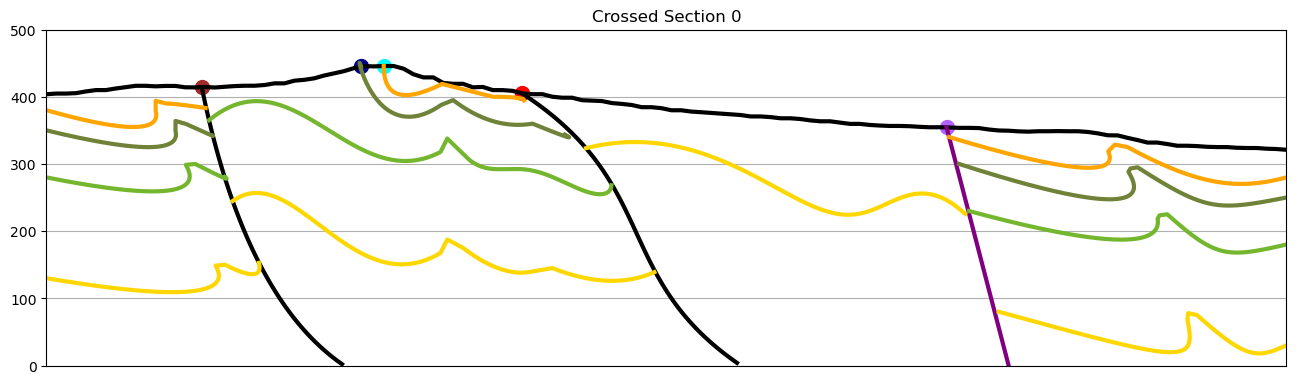

In [31]:
# Topography xs0'
ar0=500/(max(xs0_t)-min(xs0_t))
w, h = plt.figaspect(ar0)

fig, ax = plt.subplots(figsize=(w,h))
plt.plot(xs0_tt,xs0[2],color='black',linewidth=3)        # The surface
for i in range(5):                               
    ax.scatter(c0_tt[i],c0[2][i],color=c0[4][i],s=100)   # The intersections

plt.plot([c0_tt[-2],xs0_t[97]],[c0[2][-2],0],color='purple',linewidth=3)

for x in pdbzcbm:
    plt.plot(x['tt'],x['elevation'],color='black',linewidth=3)
for x in C1:
    plt.plot(x['tt'],x['elevation'],color='#FFD700',linewidth=3)
for x in C2:
    plt.plot(x['tt'],x['elevation'],color='#74B72E',linewidth=3)
for x in P:
    plt.plot(x['tt'],x['elevation'],color='#708238',linewidth=3)
for x in E1:
    plt.plot(x['tt'],x['elevation'],color='orange',linewidth=3)
#for x in pdbzE2:
 #   plt.plot(x['tt'],x['elevation'],color='orange',linewidth=3)
       
    
tick_spacing=100
ax.xaxis.set_major_locator(ticker.MultipleLocator(5*tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.ylim((0,500))
plt.xlim((min(xs0_t),max(xs0_t)))
plt.grid()
plt.title('Crossed Section 0')
plt.xticks([])

plt.savefig(FIGURESDIR+'xs0.png',facecolor='white',bbox_inches='tight')

plt.show()

Finally we use **Coreldraw** to add geological symbology

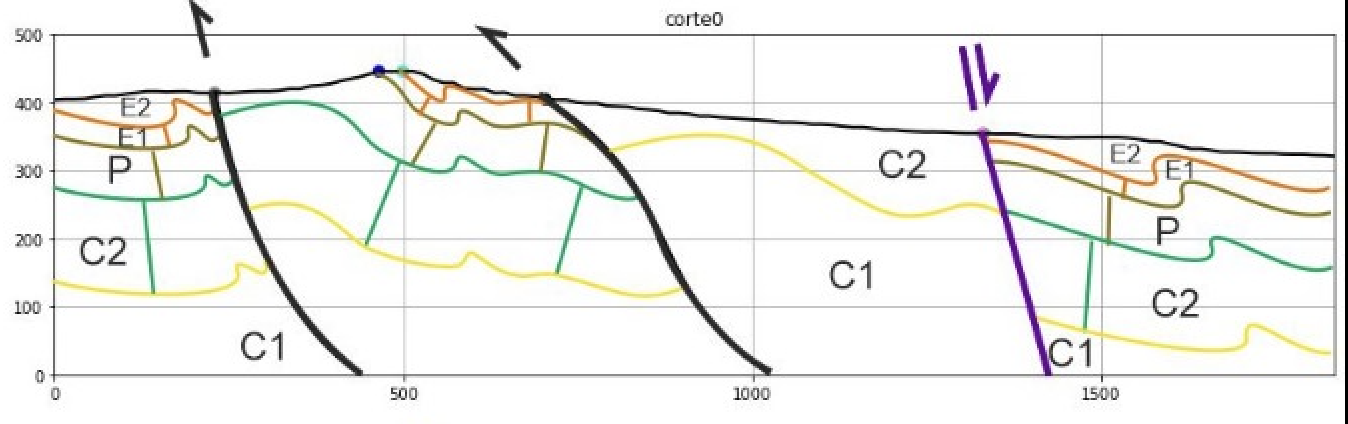

In [32]:
cot0=Image.open(FIGURESDIR+'ct0.png')
cot0


Note that the important thing is the choice of control points; we chose these so that the previous figure has an acceptable resemblance to the geological section obtained in the field.